Shibu Mohapatra

Artificial Intelligence

**Program for back propagation algorithm, then user will provide the inputsps according to requirement & display the output.**

In [5]:
from random import random
import numpy as np
import math
import matplotlib.pyplot as plt

filename = "/content/trainingdata.csv"
raw_data = open(filename, 'rt')
data = np.genfromtxt(raw_data, delimiter=' ', dtype= 'float', names = True)
col_len = np.size(data,0)

In [6]:
def activation(weighted_sum):
    return(1/(1 + math.exp(-weighted_sum)))

def initialize(no_hidden):
    ct = 0
    x = 2
    n = no_hidden
    print("-----------------------------------------------------------------------------")
    print("Initializing neural network with ", n, "hidden neurons, 1 input and 1 output.")
    print("-----------------------------------------------------------------------------")

    #Assigning Random weights for Input-Hidden layers
    weights_input = [[0 for i in range(x)] for j in range(n)]
    for i in range(n):
        for j in range(2):
            weights_input[i][j] = random()

    #Assigning Random weights for Hidden-Output layers
    weights_output = [0 for i in range(n + 1)]
    for j in range(n + 1):
        weights_output[j] = random()

    print("Weights have been assigned random values as follows: ", weights_input, weights_output)
    print("-----------------------------------------------------------------------------")

    sum_input = 0
    sum_output = 0
    out_neuron_in_hid = [[0 for i in range(col_len)] for j in range(n)]
    out_neuron_hid_out = [0 for p in range(col_len)]
    delta_out_hidden = [0 for p in range(col_len)]
    delta_hidden_in = [[0 for i in range(col_len)] for j in range(n)]
    Error_sum = 2
    J = [0 for p in range(col_len)]
    Loss = []
    step = 0.1

    # Algorithm starts here -> While -> for L -> for loops etc.
    while(Error_sum > 0.1):
        ct += 1
        Error_sum = 0
        for d_loop in range(col_len):

            # Calculating output for input-hidden layer
            for i in range(n):
                for j in range(2):
                    if (j == 0):
                        sum_input = sum_input + weights_input[i][j] * 1
                    else:
                        sum_input = sum_input + weights_input[i][j] * data[d_loop][0]
                out_neuron_in_hid[i][d_loop] = activation(sum_input)
                sum_input = 0

            #Calculating output for hidden-output layer
            for j in range(n + 1):
                if (j == 0):
                    sum_output = sum_output + weights_output[j] * 1
                else:
                    sum_output = sum_output + weights_output[j] * out_neuron_in_hid[j - 1][d_loop]
            out_neuron_hid_out[d_loop] = activation(sum_output)
            sum_output = 0

            #Delta Output-Hidden weights
            delta_out_hidden[d_loop] = (data[d_loop][1] - out_neuron_hid_out[d_loop]) * (out_neuron_hid_out[d_loop] * (1 - out_neuron_hid_out[d_loop]))

            #Delta Hidden-Input weights
            for i in range(n):
                delta_hidden_in[i][d_loop] = (delta_out_hidden[d_loop]*weights_output[i+1])*(out_neuron_in_hid[i][d_loop]*(1-out_neuron_in_hid[i][d_loop]))
      
            #Weight Updating
            for j in range(n):
                if(j==0):
                    weights_output[j] = weights_output[j] + step*delta_out_hidden[d_loop]
                else:
                    weights_output[j] = weights_output[j] + step * delta_out_hidden[d_loop]*out_neuron_in_hid[j][d_loop]
            #print("Weight output", weights_output)

            for j in range(n):
                for k in range(2):
                    if(k==0):
                        weights_input[j][k] = weights_input[j][k] + step*delta_hidden_in[j][d_loop]*1
                    else:
                        weights_input[j][k] = weights_input[j][k] + step*delta_hidden_in[j][d_loop]*data[d_loop][0]
            #print("Weight input", weights_input)

            #Loss Function
            J[d_loop] = (data[d_loop][1] - out_neuron_hid_out[d_loop]) ** 2
            Error_sum += J[d_loop]
        Loss.append(Error_sum)
        print("-----------------------------------------------------------------------------")
        print("Training error for epoch ", ct, ": ", Error_sum)

    #Closing training data file
    raw_data.close()
    #print("Loss: ", Loss)

    #Calling predict function for testing data
    predict(n, weights_input, weights_output)

    #Plotting Training error over epochs
    plt.plot(Loss)
    plt.ylabel('Training Error/Loss')
    plt.xlabel('Epochs')
    plt.show()

In [7]:
def predict(no_of_hidden, weights_input, weights_output):
    n = no_of_hidden

    #Opening testing data
    filename = "/content/testingdata.csv"
    raw_data2 = open(filename, 'rt')
    data2 = np.genfromtxt(raw_data2, delimiter=' ', dtype='float')

    col_len = np.size(data2, 0)
    J2 = [0 for p in range(col_len)]
    # Loss_train = []
    # Error_sum2 = 0
    sum_input = 0
    sum_output = 0
    out_neuron_in_hid = [[0 for i in range(col_len)] for j in range(n)]
    out_neuron_hid_out = [0 for p in range(col_len)]
    ct = 0
    for d_loop in range(col_len):
        ct += 1
        for i in range(n):
            for j in range(2):
                if (j == 0):
                    sum_input = sum_input + weights_input[i][j] * 1
                else:
                    sum_input = sum_input + weights_input[i][j] * data2[d_loop][0]
            out_neuron_in_hid[i][d_loop] = activation(sum_input)
            sum_input = 0

        for j in range(n + 1):
            if (j == 0):
                sum_output = sum_output + weights_output[j] * 1
            else:
                sum_output = sum_output + weights_output[j] * out_neuron_in_hid[j - 1][d_loop]
        out_neuron_hid_out[d_loop] = activation(sum_output)
        sum_output = 0

        J2[d_loop] = (data[d_loop][1] - out_neuron_hid_out[d_loop]) ** 2

    Avg_error = 0
    Sum_error = 0
    for i in range(col_len):
        Sum_error += J2[i]
    Avg_error = (Sum_error/(col_len))

    print("-----------------------------------------------------------------------------")
    print("Comparison between actual and predicted outputs:")
    print("-----------------------------------------------------------------------------")
    
    for i in range(col_len):
        print(data2[i][1], out_neuron_hid_out[i])
    print("-----------------------------------------------------------------------------")
    print("Testing Loss (Sum): ", Sum_error)
    print("-----------------------------------------------------------------------------")

    #Plotting Prediction and Actual outputs
    y = [0 for j in range(col_len)]
    for i in range(col_len):
        y[i] = data[i][1]
    plt.plot(y)
    plt.plot(out_neuron_hid_out)
    plt.ylabel('Y vs. Predicted Y')
    plt.xlabel('Epochs')
    plt.show()

Enter the number of hidden neurons: 2
-----------------------------------------------------------------------------
Initializing neural network with  2 hidden neurons, 1 input and 1 output.
-----------------------------------------------------------------------------
Weights have been assigned random values as follows:  [[0.9371658733197922, 0.46180067682721504], [0.3919273929942928, 0.49787581782488877]] [0.24404207124165112, 0.07173535895120131, 0.11776231113987845]
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
Training error for epoch  1 :  9.122407921199208
-----------------------------------------------------------------------------
Training error for epoch  2 :  8.608695924970746
-----------------------------------------------------------------------------
Training error for epoch  3 :  8.06978066524327
---------------------------------------------------------------------

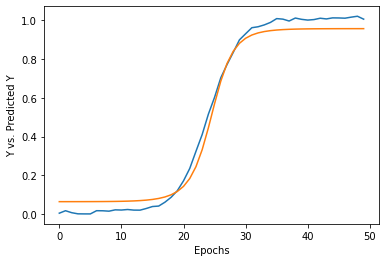

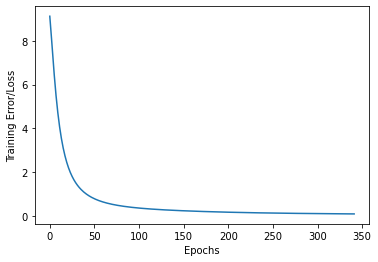

In [8]:
def main():
    no_of_hidden = input("Enter the number of hidden neurons: ")
    initialize(int(no_of_hidden))

if __name__ == "__main__":
    main()